# Project  Hot 100 - Spotify 

### Import Libraries

In [1]:
import requests
import random
import spotipy
import pandas as pd
from sklearn import datasets
import numpy as nd
import pickle

In [2]:
from bs4 import BeautifulSoup
from spotipy.oauth2 import SpotifyClientCredentials


In [3]:
sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(
    client_id = "6835d05937a84380858c701024156f49",
    client_secret = "effc5d2d73974e66abfff9175b58f287"))


####  Web Scraping

In [4]:
url = "https://www.billboard.com/charts/hot-100"

In [5]:
response = requests.get(url)
response


<Response [200]>

In [6]:
response.content

b'<!doctype html>\n<html class="" lang="">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">\n<title>The Hot 100 Chart | Billboard</title>\n<meta name="title" property="title" content="The Hot 100 Chart" />\n<meta name="twitter:site" content="@billboard">\n<meta property="og:site_name" content="Billboard" />\n<meta property="og:type" content="article" />\n<link rel="manifest" href="/manifest.json">\n<style>\n        .chart-pro-access {\n            background-image: url(\'https://www.billboard.com/assets/1603122088/images/piano/chart-pro-access-mb.png?93dbf5d96d34191a2d17\');\n        }\n\n        @media (min-width: 769px) {\n            .chart-pro-access {\n                background-image: url(\'https://www.billboard.com/assets/1603122088/images/piano/chart-pro-access-dk.png?93dbf5d96d34191a2d17\');\n            }\n        }\n    </style>\n<link rel="canonical"

In [7]:
soup = BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE html>

<html class="" lang="">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<title>The Hot 100 Chart | Billboard</title>
<meta content="The Hot 100 Chart" name="title" property="title">
<meta content="@billboard" name="twitter:site"/>
<meta content="Billboard" property="og:site_name">
<meta content="article" property="og:type">
<link href="/manifest.json" rel="manifest"/>
<style>
        .chart-pro-access {
            background-image: url('https://www.billboard.com/assets/1603122088/images/piano/chart-pro-access-mb.png?93dbf5d96d34191a2d17');
        }

        @media (min-width: 769px) {
            .chart-pro-access {
                background-image: url('https://www.billboard.com/assets/1603122088/images/piano/chart-pro-access-dk.png?93dbf5d96d34191a2d17');
            }
        }
    </style>
<link href="/charts/hot-100" rel="canonical"/>
<li

In [8]:
title = soup.select("span.chart-element__information__song")

In [9]:
song_list = []
for song in soup.select("span.chart-element__information__song"):
    song_list.append(song.get_text())

In [10]:
print(song_list)

['Positions', 'Forever After All', 'Mood', 'Laugh Now Cry Later', 'Blinding Lights', 'I Hope', 'WAP', 'Savage Love (Laxed - Siren Beat)', 'Lemonade', 'Holy', 'Rockstar', 'Dynamite', 'Before You Go', 'For The Night', 'Watermelon Sugar', 'Go Crazy', 'Said Sum', 'Circles', 'Be Like That', 'Whats Poppin', 'Got What I Got', 'Kings & Queens', 'More Than My Hometown', 'Come & Go', 'ily', 'One Of Them Girls', 'Lonely', 'Bang!', 'What You Know Bout Love', 'Better Together', 'Adore You', 'Wonder', 'Dreams', 'Tyler Herro', 'The Woo', 'One Beer', 'Love You Like I Used To', "Don't Start Now", 'Roses', 'Rags2Riches', "Lovin' On You", 'Levitating', 'Pretty Heart', 'Break My Heart', 'Some Girls', 'Happy Anywhere', 'Mood Swings', 'Everywhere But On', 'Mr. Right Now', 'I Should Probably Go To Bed', 'Franchise', '24', 'Spicy', 'Popstar', 'You Broke Me First.', 'Midnight Sky', "My Ex's Best Friend", 'Diamonds', 'Tap In', '7 Summers', 'Runnin', 'Wishing Well', 'Starting Over', 'Hawai', "Ain't Always The Co

In [11]:
artist_list = []
for artist in soup.select("span.chart-element__information__artist.text--truncate.color--secondary"):
    artist_list.append(artist.get_text())

In [12]:
print(artist_list)

['Ariana Grande', 'Luke Combs', '24kGoldn Featuring iann dior', 'Drake Featuring Lil Durk', 'The Weeknd', 'Gabby Barrett Featuring Charlie Puth', 'Cardi B Featuring Megan Thee Stallion', 'Jawsh 685 x Jason Derulo', 'Internet Money & Gunna Featuring Don Toliver & NAV', 'Justin Bieber Featuring Chance The Rapper', 'DaBaby Featuring Roddy Ricch', 'BTS', 'Lewis Capaldi', 'Pop Smoke Featuring Lil Baby & DaBaby', 'Harry Styles', 'Chris Brown & Young Thug', 'Moneybagg Yo', 'Post Malone', 'Kane Brown With Swae Lee & Khalid', 'Jack Harlow Featuring DaBaby, Tory Lanez & Lil Wayne', 'Jason Aldean', 'Ava Max', 'Morgan Wallen', 'Juice WRLD x Marshmello', 'surf mesa Featuring Emilee', 'Lee Brice', 'Justin Bieber & benny blanco', 'AJR', 'Pop Smoke', 'Luke Combs', 'Harry Styles', 'Shawn Mendes', 'Fleetwood Mac', 'Jack Harlow', 'Pop Smoke Featuring 50 Cent & Roddy Ricch', 'HARDY Featuring Lauren Alaina & Devin Dawson', 'Russell Dickerson', 'Dua Lipa', 'SAINt JHN', 'Rod Wave Featuring ATR Son Son', 'Luk

In [13]:
ranking_list = []
for rankings in soup.select("span.chart-element__rank__number"):
    ranking_list.append(rankings.get_text())

In [14]:
print(ranking_list)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']


####  Create the DataFrame of the Hot 100

In [15]:
billboard = pd.DataFrame({
    "ranking":ranking_list,
    "song":song_list,
    "artist":artist_list
    
})
billboard

ranking                 song                        artist
0        1            Positions                 Ariana Grande
1        2    Forever After All                    Luke Combs
2        3                 Mood  24kGoldn Featuring iann dior
3        4  Laugh Now Cry Later      Drake Featuring Lil Durk
4        5      Blinding Lights                    The Weeknd
..     ...                  ...                           ...
95      96             Cardigan                  Taylor Swift
96      97        Forget Me Too    Machine Gun Kelly & Halsey
97      98            La Toxica                       Farruko
98      99         Head & Heart             Joel Corry X MNEK
99     100  Wine, Beer, Whiskey               Little Big Town

[100 rows x 3 columns]

In [16]:
billboard["song"]= billboard["song"].str.upper()

In [17]:
billboard

ranking                 song                        artist
0        1            POSITIONS                 Ariana Grande
1        2    FOREVER AFTER ALL                    Luke Combs
2        3                 MOOD  24kGoldn Featuring iann dior
3        4  LAUGH NOW CRY LATER      Drake Featuring Lil Durk
4        5      BLINDING LIGHTS                    The Weeknd
..     ...                  ...                           ...
95      96             CARDIGAN                  Taylor Swift
96      97        FORGET ME TOO    Machine Gun Kelly & Halsey
97      98            LA TOXICA                       Farruko
98      99         HEAD & HEART             Joel Corry X MNEK
99     100  WINE, BEER, WHISKEY               Little Big Town

[100 rows x 3 columns]

####  Create the Define Function with the Hot 100 paylist

In [18]:
def recomended_songs(): 

    while True:
        song = input("Introduce the song that it will help us to create your playlist: ").upper()
        if song in list(billboard["song"]):
            recommended_songs = random.sample(list(billboard["song"]), 10)
            print(recommended_songs)
            break 

        else: 
            print("This song is not in our top 100 playlist, try with another one: ")
            
recomended_songs()

Introduce the song that it will help us to create your playlist: WAP
["AIN'T ALWAYS THE COWBOY", 'DYNAMITE', 'RUNNIN', 'HEATHER', 'FOR THE NIGHT', 'LOVE YOU LIKE I USED TO', 'THE OTHER GUY', 'WHAT YOU KNOW BOUT LOVE', 'I HOPE', 'BEFORE YOU GO']


### APIs SPOTIFY

####  Create a define function for the creator and playlist of Spotify 

In [19]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        try:
            # Get metadata
            playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
            playlist_features["album"] = track["track"]["album"]["name"]
            playlist_features["track_name"] = track["track"]["name"]
            playlist_features["track_id"] = track["track"]["id"]
            # Get audio features
            audio_features = sp.audio_features(playlist_features["track_id"])[0]
            for feature in playlist_features_list[4:]:
                playlist_features[feature] = audio_features[feature]
            
            # Concat the dfs
            track_df = pd.DataFrame(playlist_features, index = [0])
            playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        except:
            pass
        
    return playlist_df


####  Creating a diccionary in order to link all playlits that I choose from Spotify: Acoustics Playlist


In [20]:

playlist_dict = {
    
    "playlist_acoustic_guitar_hits" : ("Matt Johnson", "https://open.spotify.com/playlist/1bZMZbVIByq6Oexq7g38iO"), 
    "playlist_acoustic_hits" : ("Spotify", "https://open.spotify.com/playlist/37i9dQZF1DX4VvfRBFClxm"),
    "playlist_exitos_acusticos": ("mdelalonso", "https://open.spotify.com/playlist/6X7geZ9n6miRNxyJgcuotB"),
    "playlist_acoustic_covers": ("Spotify","https://open.spotify.com/playlist/37i9dQZF1DWXmlLSKkfdAk"),
    "playlist_acoustic_chill": ("Spotify","https://open.spotify.com/playlist/37i9dQZF1DWYGZAMYFDM8S"),
    "playlist_autumn_acoustic": ("Spotify","https://open.spotify.com/playlist/37i9dQZF1DWUNIrSzKgQbP"),
    "playlist_acoustic_blues": ("Spotify","https://open.spotify.com/playlist/37i9dQZF1DX2iUghHXGIjj"),
    "playlist_classic_acoustic":("Spotify","https://open.spotify.com/playlist/37i9dQZF1DX504r1DvyvxG"),
    "playlist_Fall_Acoustic": ("Wander World Music", "https://open.spotify.com/playlist/2pQurqQxtFiX1ecv5ZSIFU"),
    "playlist_Calming_Acoustic" : ("frtyfve", "https://open.spotify.com/playlist/09a4ki7f0XxNzyTPwusWkJ"),
    "playlist_Chill_Out_Acoustics" : ("Harry Antrobus", "https://open.spotify.com/playlist/20yUNJhxx9YukTP6jIfQCf"),
    "playlist_90sAcoustic" : ("Spotify", "https://open.spotify.com/playlist/37i9dQZF1DXb9LIXaj5WhL"),
    "playlist_2000s_Acoustics" : ("Raisa Albar", "https://open.spotify.com/playlist/0ntJYJ4a8eS5ulq7ACKmeF"),
    "playlist_Yoga_Acoustics" : ("Spotify", "https://open.spotify.com/playlist/37i9dQZF1DWUPAFOWtSz6P"),
    "playlist_K_Pop_Acoustics" : ("Spotify", "https://open.spotify.com/playlist/37i9dQZF1DX1wdZM1FEz79"),
    "playlist_Top_Acoustics" : ("Paul Bandiera", "https://open.spotify.com/playlist/3Zh2tLy6roJL4RnLm3VkeL"),
    "playlist_Acoustics_Cover_Favorites" : ("ELgarcia", "https://open.spotify.com/playlist/6qwbbzswth2q0FR6yOMb5s"),
    "playlist_Country_Acoustics" : ("Jordan Rogers", "https://open.spotify.com/playlist/6xzACFJQ9q3Z5B2EQiQTN7"),
    "playlist_Soothing_Acoustics" : ("Zayna", "https://open.spotify.com/playlist/5zqb81zMEXHFLh3zAj79QF")
}

In [21]:
def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

In [22]:
multiple_playlist_df = analyze_playlist_dict(playlist_dict)

#### Spotify DataFrame

In [23]:
multiple_playlist_df

artist  \
0              Matt Johnson   
1                    Sigala   
2          Hailee Steinfeld   
3         Amber Leigh Irish   
4               Sam Fischer   
...                     ...   
1621           Brooklyn Duo   
1622         Steve Petrunak   
1623            Daniel Jang   
1624  Dallas String Quartet   
1625          Rachel Pierce   

                                                  album  \
0                             Heal the World (Acoustic)   
1                              Lasting Lover (Acoustic)   
2                                   Starving (Acoustic)   
3                                   Diamonds (Acoustic)   
4                                  This City (Acoustic)   
...                                                 ...   
1621                               Brooklyn Sessions II   
1622  Shake It Off: Instrumental Guitar Covers of Po...   
1623                                              Sugar   
1624                                                Red   
1625                                       Violin Cover   

                       track_name                track_id  danceability  \
0       Heal the World - Acoustic  3xcIbxd1AJveTfs8ehX6Pb         0.599   
1        Lasting Lover - Acoustic  0TGU6ELkO9MRv7aHL3QVrl         0.554   
2             Starving - Acoustic  3rdTo5LQGou3pS2ZLxTAcQ         0.788   
3             Diamonds - Acoustic  4RVmTDYYWR4xivKlLMjS0q         0.574   
4            This City - Acoustic  6ia9TgcqUz4IaGRoKXW0oF         0.625   
...                           ...                     ...           ...   
1621          Love Me Like You Do  7CNO19a6MzNLmBd3m2iCbU         0.304   
1622  Rude (Instrumental Version)  3MRrI9xd9mkxLFWCFcwmAb         0.717   
1623                        Sugar  2emqTEmjMAC5Agvb9HLjfU         0.570   
1624         Don't Stop Believin'  0QE84LDZvfTNSGxQcadbeV         0.671   
1625             A Thousand Years  7Ere7g0XUQ43JHi44NplLS         0.306   

      energy key  loudness mode  speechiness instrumentalness  liveness  \
0      0.427   9    -7.501    0       0.0546                0    0.3160   
1      0.378   1    -6.700    1       0.0302                0    0.1100   
2      0.262   4    -8.354    1       0.0419                0    0.1170   
3      0.247  10    -9.458    0       0.0402                0    0.1460   
4      0.221  10   -10.576    1       0.0438                0    0.0946   
...      ...  ..       ...  ...          ...              ...       ...   
1621   0.275   0   -11.194    1       0.0301             0.89    0.1190   
1622   0.518   1    -6.539    1       0.0447             0.85    0.1390   
1623   0.616   9    -3.349    0       0.0281            0.187    0.0909   
1624   0.551   4    -4.416    1       0.0311           0.0491    0.0991   
1625   0.572  10    -5.173    1       0.0289            0.823    0.1340   

      valence    tempo duration_ms time_signature  \
0       0.618  154.130      238934              4   
1       0.319  124.862      232919              4   
2       0.719   99.859      181293              4   
3       0.372   81.901      179407              4   
4       0.702  139.807      206820              4   
...       ...      ...         ...            ...   
1621    0.115   94.867      195419              4   
1622    0.627  143.779      221751              4   
1623    0.242  119.948      207427              4   
1624    0.943  126.042      186320              4   
1625    0.133   93.135      199184              4   

                           playlist  
0     playlist_acoustic_guitar_hits  
1     playlist_acoustic_guitar_hits  
2     playlist_acoustic_guitar_hits  
3     playlist_acoustic_guitar_hits  
4     playlist_acoustic_guitar_hits  
...                             ...  
1621    playlist_Soothing_Acoustics  
1622    playlist_Soothing_Acoustics  
1623    playlist_Soothing_Acoustics  
1624    playlist_Soothing_Acoustics  
1625    playlist_Soothing_Acoustics  

[1626 rows x 17 columns]

####  In order to find the cluster

In [24]:
from sklearn.preprocessing import StandardScaler

#### Select the colums that I want to analize that will define my audio features in a DataFrame

In [25]:
X = multiple_playlist_df[['danceability','energy','loudness','speechiness','instrumentalness','liveness','valence']]

In [26]:
X


danceability  energy  loudness  speechiness instrumentalness  liveness  \
0            0.599   0.427    -7.501       0.0546                0    0.3160   
1            0.554   0.378    -6.700       0.0302                0    0.1100   
2            0.788   0.262    -8.354       0.0419                0    0.1170   
3            0.574   0.247    -9.458       0.0402                0    0.1460   
4            0.625   0.221   -10.576       0.0438                0    0.0946   
...            ...     ...       ...          ...              ...       ...   
1621         0.304   0.275   -11.194       0.0301             0.89    0.1190   
1622         0.717   0.518    -6.539       0.0447             0.85    0.1390   
1623         0.570   0.616    -3.349       0.0281            0.187    0.0909   
1624         0.671   0.551    -4.416       0.0311           0.0491    0.0991   
1625         0.306   0.572    -5.173       0.0289            0.823    0.1340   

      valence  
0       0.618  
1       0.319  
2       0.719  
3       0.372  
4       0.702  
...       ...  
1621    0.115  
1622    0.627  
1623    0.242  
1624    0.943  
1625    0.133  

[1626 rows x 7 columns]

In [28]:
scaler = StandardScaler()


In [29]:
X_scaled = scaler.fit_transform(X)


In [30]:
pd.DataFrame(X_scaled)

0         1         2         3         4         5         6
0     0.226560  0.432304  0.775883  0.291506 -0.340884  1.403652  1.079795
1    -0.107999  0.156392  0.980046 -0.422684 -0.340884 -0.337613 -0.441968
2     1.631709 -0.496789  0.558466 -0.080225 -0.340884 -0.278443  1.593836
3     0.040694 -0.581252  0.277073 -0.129984 -0.340884 -0.033314 -0.172224
4     0.419861 -0.727654 -0.007889 -0.024611 -0.340884 -0.467785  1.507314
...        ...       ...       ...       ...       ...       ...       ...
1621 -1.966662 -0.423587 -0.165408 -0.425611  3.568309 -0.261538 -1.480228
1622  1.103849  0.944713  1.021082  0.001732  3.392615 -0.092483  1.125601
1623  0.010955  1.496538  1.834166 -0.484152  0.480486 -0.499060 -0.833860
1624  0.761855  1.130532  1.562203 -0.396341 -0.125220 -0.429748  2.733886
1625 -1.951792  1.248780  1.369255 -0.460736  3.274022 -0.134747 -1.388617

[1626 rows x 7 columns]

#### Data Frame with the Audio Features

In [31]:
X_scaled = pd.DataFrame(X_scaled, columns=[X.columns])

X_scaled = X_scaled[['danceability','energy','loudness','speechiness','instrumentalness','liveness','valence']]

X_scaled

danceability    energy  loudness speechiness instrumentalness  liveness  \
0        0.226560  0.432304  0.775883    0.291506        -0.340884  1.403652   
1       -0.107999  0.156392  0.980046   -0.422684        -0.340884 -0.337613   
2        1.631709 -0.496789  0.558466   -0.080225        -0.340884 -0.278443   
3        0.040694 -0.581252  0.277073   -0.129984        -0.340884 -0.033314   
4        0.419861 -0.727654 -0.007889   -0.024611        -0.340884 -0.467785   
...           ...       ...       ...         ...              ...       ...   
1621    -1.966662 -0.423587 -0.165408   -0.425611         3.568309 -0.261538   
1622     1.103849  0.944713  1.021082    0.001732         3.392615 -0.092483   
1623     0.010955  1.496538  1.834166   -0.484152         0.480486 -0.499060   
1624     0.761855  1.130532  1.562203   -0.396341        -0.125220 -0.429748   
1625    -1.951792  1.248780  1.369255   -0.460736         3.274022 -0.134747   

       valence  
0     1.079795  
1    -0.441968  
2     1.593836  
3    -0.172224  
4     1.507314  
...        ...  
1621 -1.480228  
1622  1.125601  
1623 -0.833860  
1624  2.733886  
1625 -1.388617  

[1626 rows x 7 columns]

#### Finding the Cluster 

In [32]:
from sklearn.cluster import KMeans


In [33]:
kmeans = KMeans(n_clusters = 3, random_state=1234)


In [34]:
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=1234)

In [35]:
clusters = kmeans.predict(X_scaled)
                          

In [36]:
X_scaled


danceability    energy  loudness speechiness instrumentalness  liveness  \
0        0.226560  0.432304  0.775883    0.291506        -0.340884  1.403652   
1       -0.107999  0.156392  0.980046   -0.422684        -0.340884 -0.337613   
2        1.631709 -0.496789  0.558466   -0.080225        -0.340884 -0.278443   
3        0.040694 -0.581252  0.277073   -0.129984        -0.340884 -0.033314   
4        0.419861 -0.727654 -0.007889   -0.024611        -0.340884 -0.467785   
...           ...       ...       ...         ...              ...       ...   
1621    -1.966662 -0.423587 -0.165408   -0.425611         3.568309 -0.261538   
1622     1.103849  0.944713  1.021082    0.001732         3.392615 -0.092483   
1623     0.010955  1.496538  1.834166   -0.484152         0.480486 -0.499060   
1624     0.761855  1.130532  1.562203   -0.396341        -0.125220 -0.429748   
1625    -1.951792  1.248780  1.369255   -0.460736         3.274022 -0.134747   

       valence  
0     1.079795  
1    -0.441968  
2     1.593836  
3    -0.172224  
4     1.507314  
...        ...  
1621 -1.480228  
1622  1.125601  
1623 -0.833860  
1624  2.733886  
1625 -1.388617  

[1626 rows x 7 columns]

In [37]:
X_scaled.columns

MultiIndex([(    'danceability',),
            (          'energy',),
            (        'loudness',),
            (     'speechiness',),
            ('instrumentalness',),
            (        'liveness',),
            (         'valence',)],
           )

In [38]:
kmeans.inertia_

7751.555938583209

In [39]:
# Try to run Kmeans with all values of K, from 2 to 20
K = range(2, 20)

# For each model, store the inertia in a list
inertia = []

for k in K:
            kmeans = KMeans(n_clusters=k, 
                            random_state=1234)
            kmeans.fit(X_scaled)
            inertia.append(kmeans.inertia_)
print(inertia)


[9228.843211021454, 7751.555938583209, 6689.710658643242, 5965.360967571621, 5136.305995179815, 4637.525404014371, 4313.4394723046935, 4063.161386715572, 3843.974830891082, 3660.639599115835, 3540.4217743125696, 3398.1575924165577, 3228.9049572600306, 3136.959738686711, 3032.548557116911, 2903.751749867072, 2811.932033556496, 2768.3213723683725]


#### Elbow Method to find the Cluster

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

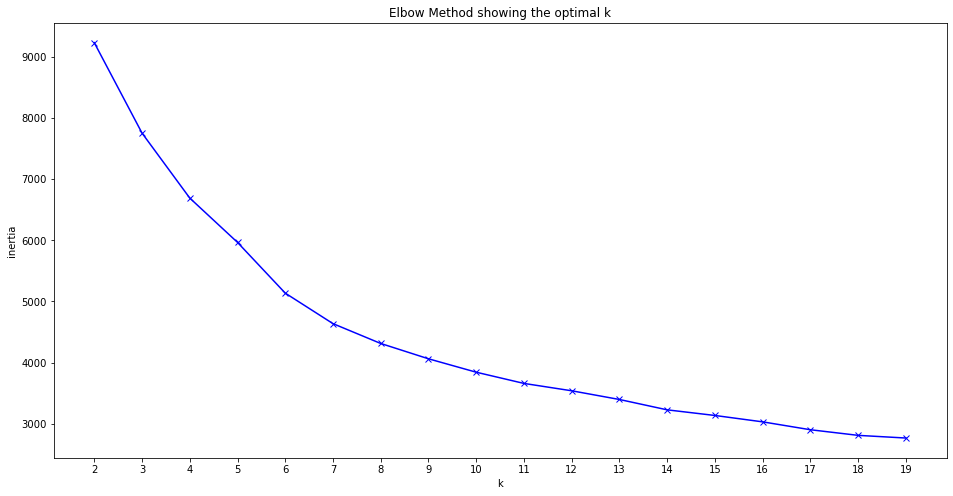

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Silhouette score find the Cluster

In [41]:
from sklearn.metrics import silhouette_score
# repeat the same process, now with the silhouette score
K = range(2, 20)
silhouette = []
for n in K:
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(X_scaled)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X_scaled, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))

For n_clusters = 2, silhouette score is 0.20450819477284649)
For n_clusters = 3, silhouette score is 0.23981559476380268)
For n_clusters = 4, silhouette score is 0.2577985996127756)
For n_clusters = 5, silhouette score is 0.21008319744345433)
For n_clusters = 6, silhouette score is 0.2292131246106546)
For n_clusters = 7, silhouette score is 0.21787500338749957)
For n_clusters = 8, silhouette score is 0.2126869567129853)
For n_clusters = 9, silhouette score is 0.20881979191907932)
For n_clusters = 10, silhouette score is 0.19446873214854926)
For n_clusters = 11, silhouette score is 0.1902621731739476)
For n_clusters = 12, silhouette score is 0.19801557636790143)
For n_clusters = 13, silhouette score is 0.18672954342253556)
For n_clusters = 14, silhouette score is 0.18060125823522988)
For n_clusters = 15, silhouette score is 0.19067062787569666)
For n_clusters = 16, silhouette score is 0.19021906211576078)
For n_clusters = 17, silhouette score is 0.1921254710192165)
For n_clusters = 18, 

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

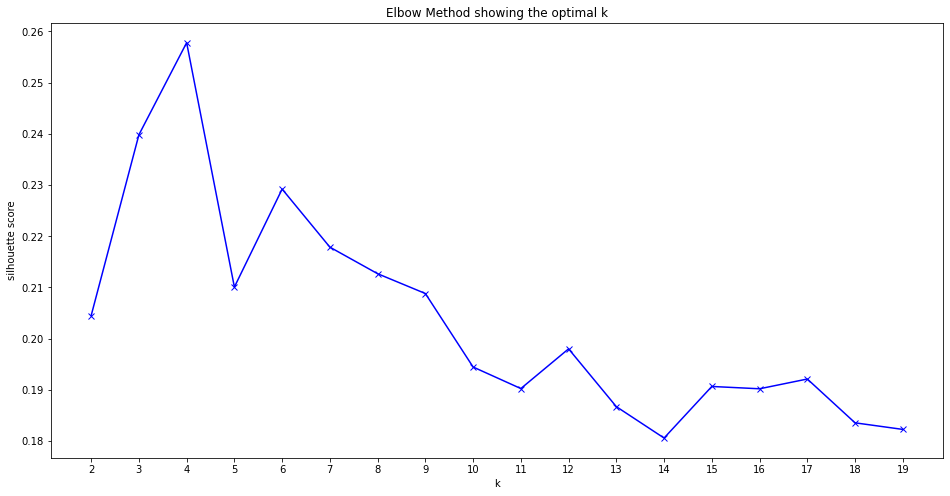

In [42]:
# plot
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### As I found my Cluster due to the silhouette score y calculate again the Inertia

In [43]:
kmeans = KMeans(n_clusters=5,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)


6432.071200810821


In [44]:
kmeans = KMeans(n_clusters = 5, random_state=1234)


In [45]:
kmeans.fit(X_scaled)


KMeans(n_clusters=5, random_state=1234)

In [46]:
kmeans.inertia_


5965.360967571621

In [47]:
clusters = kmeans.predict(X_scaled)


In [48]:
X_scaled


danceability    energy  loudness speechiness instrumentalness  liveness  \
0        0.226560  0.432304  0.775883    0.291506        -0.340884  1.403652   
1       -0.107999  0.156392  0.980046   -0.422684        -0.340884 -0.337613   
2        1.631709 -0.496789  0.558466   -0.080225        -0.340884 -0.278443   
3        0.040694 -0.581252  0.277073   -0.129984        -0.340884 -0.033314   
4        0.419861 -0.727654 -0.007889   -0.024611        -0.340884 -0.467785   
...           ...       ...       ...         ...              ...       ...   
1621    -1.966662 -0.423587 -0.165408   -0.425611         3.568309 -0.261538   
1622     1.103849  0.944713  1.021082    0.001732         3.392615 -0.092483   
1623     0.010955  1.496538  1.834166   -0.484152         0.480486 -0.499060   
1624     0.761855  1.130532  1.562203   -0.396341        -0.125220 -0.429748   
1625    -1.951792  1.248780  1.369255   -0.460736         3.274022 -0.134747   

       valence  
0     1.079795  
1    -0.441968  
2     1.593836  
3    -0.172224  
4     1.507314  
...        ...  
1621 -1.480228  
1622  1.125601  
1623 -0.833860  
1624  2.733886  
1625 -1.388617  

[1626 rows x 7 columns]

####  Creo el DataFrame de Clusters 

In [49]:

cluster = pd.DataFrame(clusters, columns=["clusters"])
cluster

clusters
0            4
1            1
2            4
3            0
4            4
...        ...
1621         3
1622         3
1623         1
1624         4
1625         3

[1626 rows x 1 columns]

### Uno del DataFrame de Spotify y el de Clusters 

In [50]:
spotify_playlist_df = pd.concat([multiple_playlist_df, cluster], axis = 1)
spotify_playlist_df

artist  \
0              Matt Johnson   
1                    Sigala   
2          Hailee Steinfeld   
3         Amber Leigh Irish   
4               Sam Fischer   
...                     ...   
1621           Brooklyn Duo   
1622         Steve Petrunak   
1623            Daniel Jang   
1624  Dallas String Quartet   
1625          Rachel Pierce   

                                                  album  \
0                             Heal the World (Acoustic)   
1                              Lasting Lover (Acoustic)   
2                                   Starving (Acoustic)   
3                                   Diamonds (Acoustic)   
4                                  This City (Acoustic)   
...                                                 ...   
1621                               Brooklyn Sessions II   
1622  Shake It Off: Instrumental Guitar Covers of Po...   
1623                                              Sugar   
1624                                                Red   
1625                                       Violin Cover   

                       track_name                track_id  danceability  \
0       Heal the World - Acoustic  3xcIbxd1AJveTfs8ehX6Pb         0.599   
1        Lasting Lover - Acoustic  0TGU6ELkO9MRv7aHL3QVrl         0.554   
2             Starving - Acoustic  3rdTo5LQGou3pS2ZLxTAcQ         0.788   
3             Diamonds - Acoustic  4RVmTDYYWR4xivKlLMjS0q         0.574   
4            This City - Acoustic  6ia9TgcqUz4IaGRoKXW0oF         0.625   
...                           ...                     ...           ...   
1621          Love Me Like You Do  7CNO19a6MzNLmBd3m2iCbU         0.304   
1622  Rude (Instrumental Version)  3MRrI9xd9mkxLFWCFcwmAb         0.717   
1623                        Sugar  2emqTEmjMAC5Agvb9HLjfU         0.570   
1624         Don't Stop Believin'  0QE84LDZvfTNSGxQcadbeV         0.671   
1625             A Thousand Years  7Ere7g0XUQ43JHi44NplLS         0.306   

      energy key  loudness mode  speechiness instrumentalness  liveness  \
0      0.427   9    -7.501    0       0.0546                0    0.3160   
1      0.378   1    -6.700    1       0.0302                0    0.1100   
2      0.262   4    -8.354    1       0.0419                0    0.1170   
3      0.247  10    -9.458    0       0.0402                0    0.1460   
4      0.221  10   -10.576    1       0.0438                0    0.0946   
...      ...  ..       ...  ...          ...              ...       ...   
1621   0.275   0   -11.194    1       0.0301             0.89    0.1190   
1622   0.518   1    -6.539    1       0.0447             0.85    0.1390   
1623   0.616   9    -3.349    0       0.0281            0.187    0.0909   
1624   0.551   4    -4.416    1       0.0311           0.0491    0.0991   
1625   0.572  10    -5.173    1       0.0289            0.823    0.1340   

      valence    tempo duration_ms time_signature  \
0       0.618  154.130      238934              4   
1       0.319  124.862      232919              4   
2       0.719   99.859      181293              4   
3       0.372   81.901      179407              4   
4       0.702  139.807      206820              4   
...       ...      ...         ...            ...   
1621    0.115   94.867      195419              4   
1622    0.627  143.779      221751              4   
1623    0.242  119.948      207427              4   
1624    0.943  126.042      186320              4   
1625    0.133   93.135      199184              4   

                           playlist  clusters  
0     playlist_acoustic_guitar_hits         4  
1     playlist_acoustic_guitar_hits         1  
2     playlist_acoustic_guitar_hits         4  
3     playlist_acoustic_guitar_hits         0  
4     playlist_acoustic_guitar_hits         4  
...                             ...       ...  
1621    playlist_Soothing_Acoustics         3  
1622    playlist_Soothing_Acoustics         3  
1623    playlist_Soothing_Acoustics         1  
1624    playlist_Soo

In [51]:
pickle.dump(kmeans, open("kmeans", "wb"))
pickle.dump(scaler, open("scaler", "wb"))


In [52]:
spotify_playlist_df["clusters"].value_counts()


0    516
1    488
4    450
3    119
2     53
Name: clusters, dtype: int64

In [53]:
multiple_playlist_df["artist"]

0                Matt Johnson
1                      Sigala
2            Hailee Steinfeld
3           Amber Leigh Irish
4                 Sam Fischer
                ...          
1621             Brooklyn Duo
1622           Steve Petrunak
1623              Daniel Jang
1624    Dallas String Quartet
1625            Rachel Pierce
Name: artist, Length: 1626, dtype: object

In [57]:
spotify = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(
    client_id = "6835d05937a84380858c701024156f49",
    client_secret = "effc5d2d73974e66abfff9175b58f287"))


### Create the Define Function that links the music from the Hot 100 and the Spotify

In [80]:
def spotify_songs():
    song = input("Introduce the song that it will help us to create your playlist: ").upper()
    artist = input("Introduce the artistt: ").capitalize()

    if song in list(billboard["song"]):
        recommended_songs = random.sample(list(billboard["song"]), 10)
        print(recommended_songs)
        
    else: 
        
        results = spotify.search(q="track:" + song + " artist:" + artist, limit=10)
        song_features = pd.DataFrame(spotify.audio_features(results['tracks']['items'][0]['uri']))
        print()
        final_features = song_features[['danceability','energy','loudness','speechiness','instrumentalness','liveness','valence']]
        cluster = kmeans.predict(scaler.transform(final_features))
        match_song = spotify_playlist_df[spotify_playlist_df['clusters'] == int(cluster)]['track_name']
        k = int(input('How many songs do you want to listen? '))
        print('\nHere are the list of songs!\n')
        list_of_songs = random.sample(list(match_song),k)

        for song in list_of_songs:
            print(song)

In [81]:
kmeans = pickle.load(open("kmeans", "rb"))
scaler = pickle.load(open("scaler", "rb"))

In [82]:
spotify_songs()

Introduce the song that it will help us to create your playlist: despacito
Introduce the artistt: luis fonsi

How many songs do you want? 15

There you have a list of songs!

Save Tonight
Just You and I - Acoustic
Starving - Acoustic
Hurt Somebody (With Julia Michaels)
Shotgun - Acoustic Version
Coffee and TV
Good Riddance (Time of Your Life)
Take You Dancing - Acoustic
Be OK (Acoustic)
America the Beautiful
Someday
September - Recorded at The Tracking Room Nashville
Souvenirs
Intentions - Acoustic
Pretty Shining People - Acoustic Version
